## Fundamentals of Data Science 



### Part 2
<div>
Dataset Description 
The dataset provided, Bank_Churn.csv, includes 10,000 samples with the following columns: 


• CustomerId: A unique identifier for each customer 

• Surname: The customer's last name. 

• CreditScore: A numerical value representing the customer's credit score. 

• Geography: The country where the customer resides. 

• Gender: The customer's gender. 

• Age: The customer's age. 

• Tenure: The number of years the customer has been with the bank.

• Balance: The customer's account balance. 

• NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card). 

• HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no). 

• IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no). 

• EstimatedSalary: The estimated salary of the customer. 

• Exited: Whether the customer has churned (1 = yes, 0 = no). 

</div>


## Install and Import Libraries

In [ ]:
# Import the importlib module to check if the required libraries are installed
import importlib.util

# List of required libraries
required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn','sklearn','tensorflow']

# Install the required libraries if they are not already installed
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        'pip install scikit-learn'

# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow
from sklearn.metrics import classification_report, accuracy_score

## Part 0: Initial Data Exploration

### Task 1: Load and Preview the Data

In [24]:
df  = pd.read_csv(r'D:\uni\Dats Sience\CA\CA2\youtube-new\CAvideos.csv')
print(df.head())
print(df.tail())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

### Task 2: Dataset Summary

In [25]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  is

### Task 3:  Identify Missing and Duplicate Data

In [ ]:

print('null values for category_id is :%i'%df['category_id'].isnull().sum())
print('null values for channel_title is :%i'%df['channel_title'].isnull().sum())
print('null values for comment_count is :%i'%df['comment_count'].isnull().sum())
print('null values for comment_disabled is :%i'%df['comments_disabled'].isnull().sum())
print('null values for dislikes is :%i'%df['dislikes'].isnull().sum())
print('null values for is_trending is :%i'%df['is_trending'].isnull().sum())
print('null values for likes is :%i'%df['likes'].isnull().sum())
print('null values for publish_time is :%i'%df['publish_time'].isnull().sum())
print('null values for ratings_disabled is :%i'%df['ratings_disabled'].isnull().sum())
print('null values for tags is :%i'%df['tags'].isnull().sum())
print('null values for thumbnail_link is :%i'%df['thumbnail_link'].isnull().sum())
print('null values for title is :%i'%df['title'].isnull().sum())
print('null values for trending_date is :%i'%df['trending_date'].isnull().sum())
print('null values for video_error_or_removed is :%i'%df['video_error_or_removed'].isnull().sum())
print('null values for channel_title is :%i'%df['channel_title'].isnull().sum())
print('null values for video_id is :%i'%df['video_id'].isnull().sum())
print('null values for views is :%i'%df['views'].isnull().sum())

duplicate = df['video_id'].duplicated().sum()
print('number of duplicate is : %i'%duplicate)
if duplicate ==0 :
    pass
else :
    df['video_id'].drop_duplicates()
    print('number of duplicate is : 0')
    


null values for category_id is :0
null values for channel_title is :0
null values for comment_count is :0
null values for comment_disabled is :0
null values for dislikes is :0
null values for is_trending is :0
null values for likes is :0
null values for publish_time is :0
null values for ratings_disabled is :0
null values for tags is :0
null values for thumbnail_link is :0
null values for title is :0
null values for trending_date is :0
null values for video_error_or_removed is :0
null values for channel_title is :0
null values for video_id is :0
null values for views is :0
number of duplicate is : 16777
number of duplicate is : 0


### Task 4:  Distribution of Key Variables


category_id
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21932\1223936570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_id', data=df, palette='viridis')


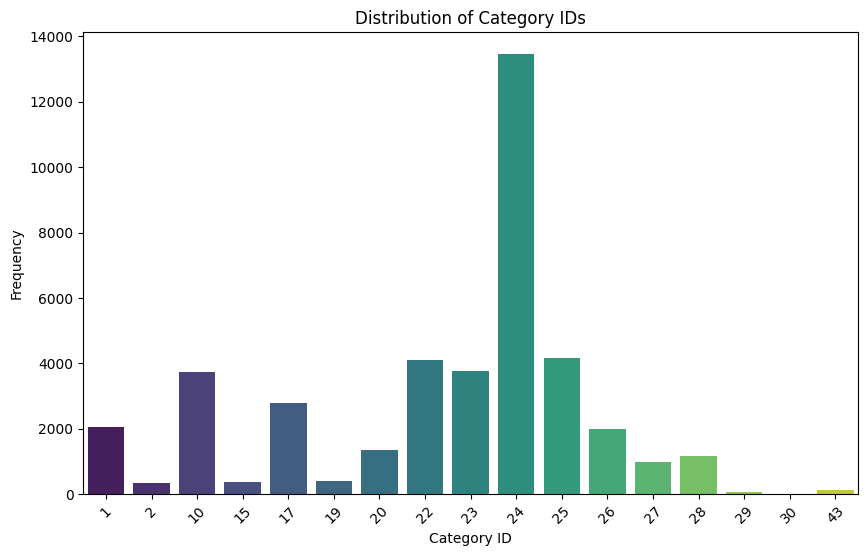

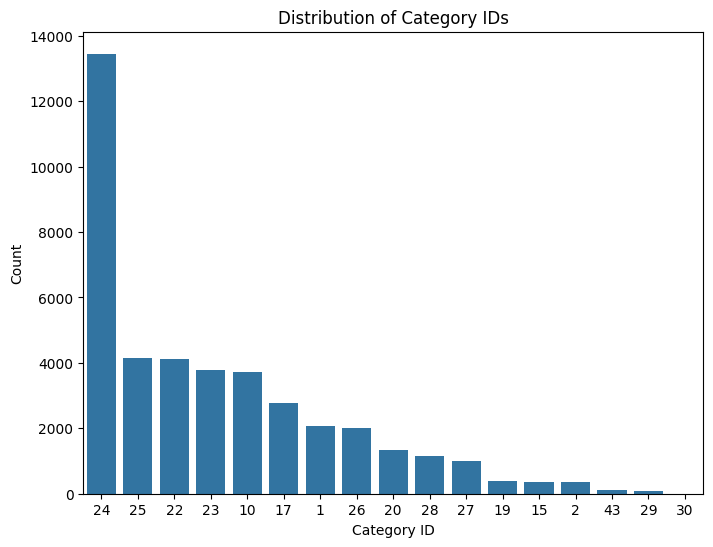

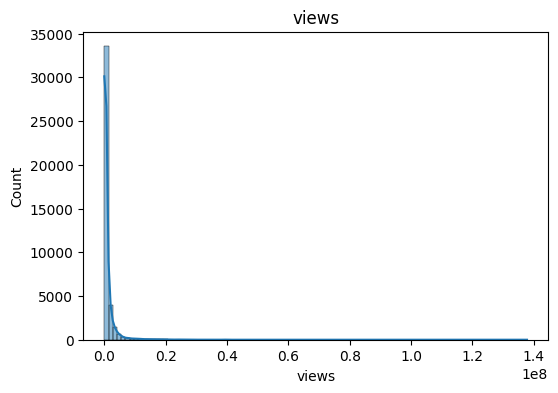

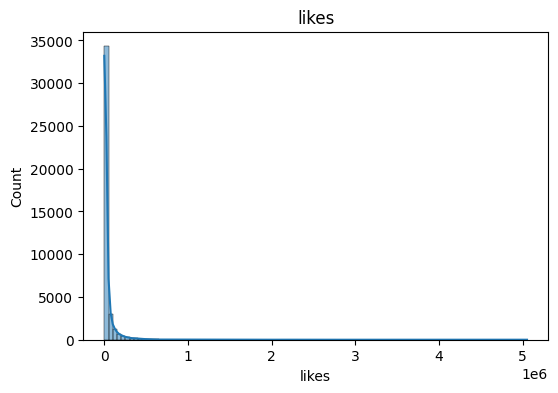

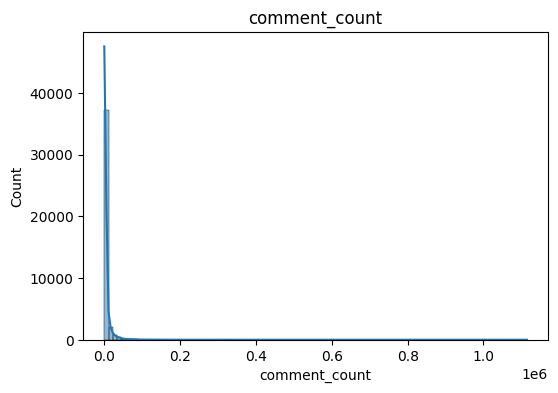

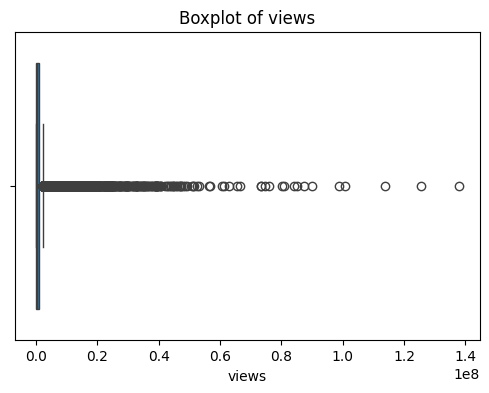

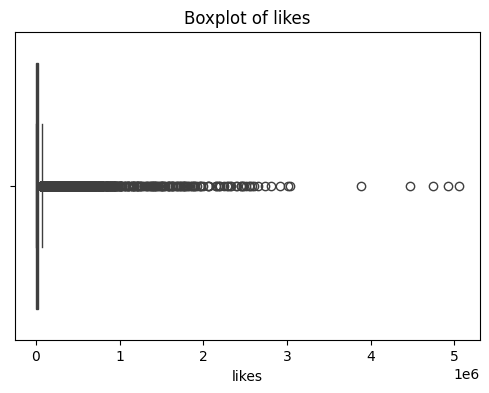

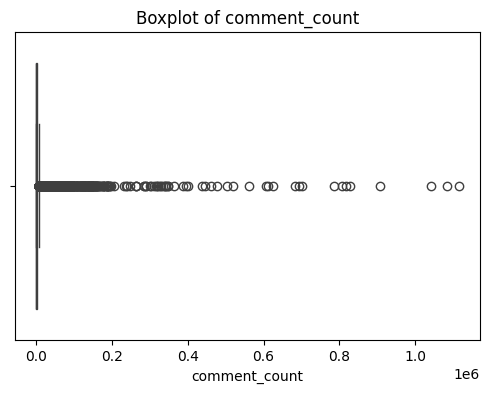

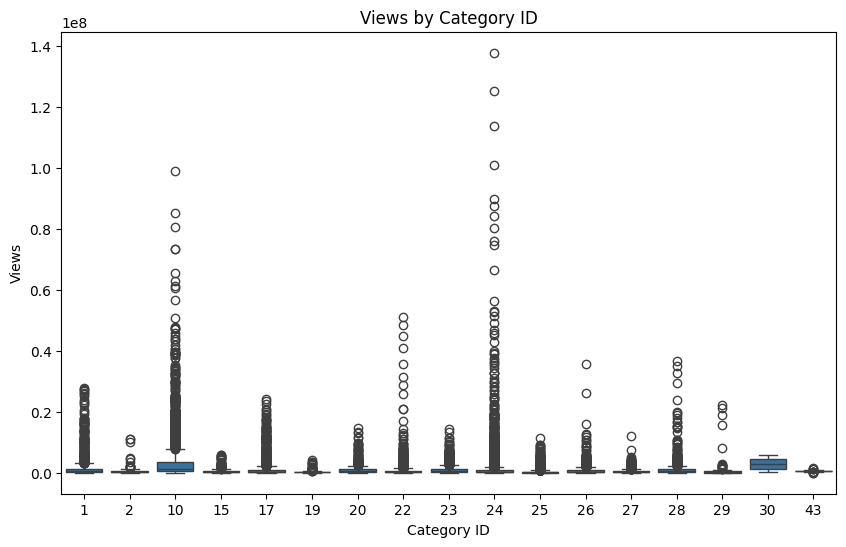

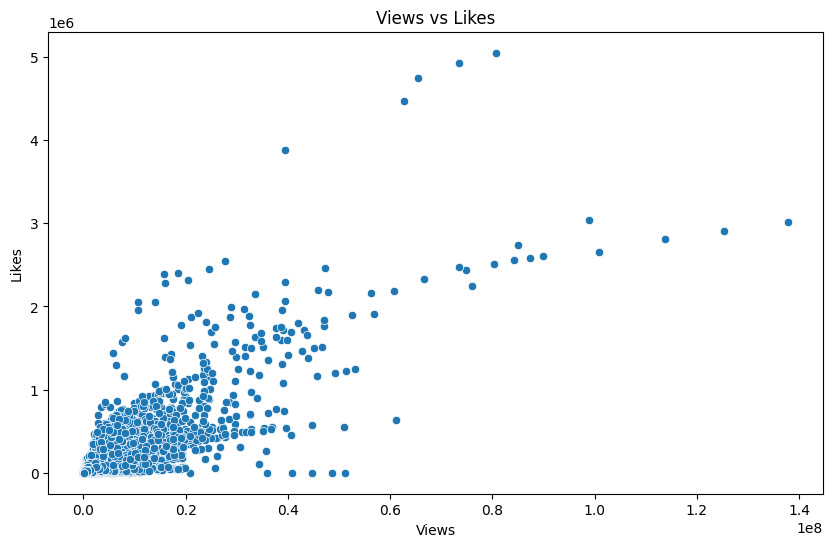

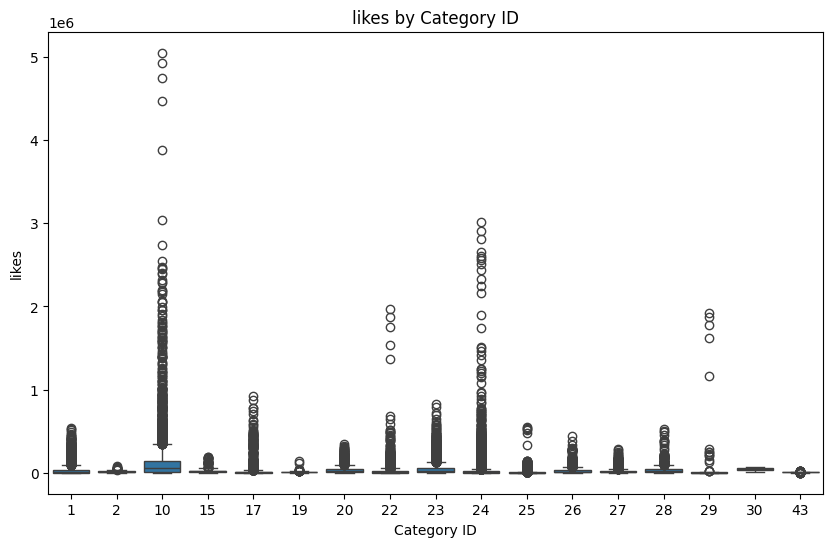

In [ ]:
print(df['category_id'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='category_id', data=df, palette='viridis')
plt.title('Distribution of Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='category_id', data=df, order=df['category_id'].value_counts().index)
plt.title("Distribution of Category IDs")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()

numerical_features = ['views', 'likes', 'comment_count']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=100)
    plt.title(feature)
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='views', data=df)
plt.title("Views by Category ID")
plt.xlabel("Category ID")
plt.ylabel("Views")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='likes', data=df)
plt.title("likes by Category ID")
plt.xlabel("Category ID")
plt.ylabel("likes")
plt.show()


## Part 1:  Logistic Regression

### Task 1: Data Preparation for Classification

In [ ]:

df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / (df['views'] )

features = ['likes','dislikes','comment_count']
target = 'is_trending' 
scaler = MinMaxScaler() 
df[features] = scaler.fit_transform(df[features])
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


### Task 2: Implement Logistic Regression with Gradient Descent

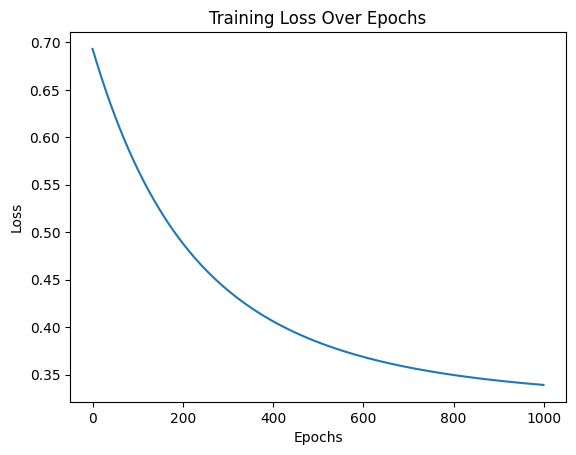

Accuracy of manual logistic regression: 0.8959276018099548


In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = y.shape[0]
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = X.shape[0]
    loss_history = []
    for epoch in range(epochs):
        
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias, loss_history


weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 1000
weights, bias, loss_history = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, epochs)

plt.plot(range(epochs), loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    return sigmoid(linear_model) >= 0.5

manual_predictions = predict(X_test.values, weights, bias)
accuracy = np.mean(manual_predictions == y_test.values)
print(f"Accuracy of manual logistic regression: {accuracy}")




### Task 3: Compare with a Library Implementation

Accuracy of manual logistic regression: 0.8959276018099548
Accuracy of scikit-learn logistic regression: 0.9190412131588602


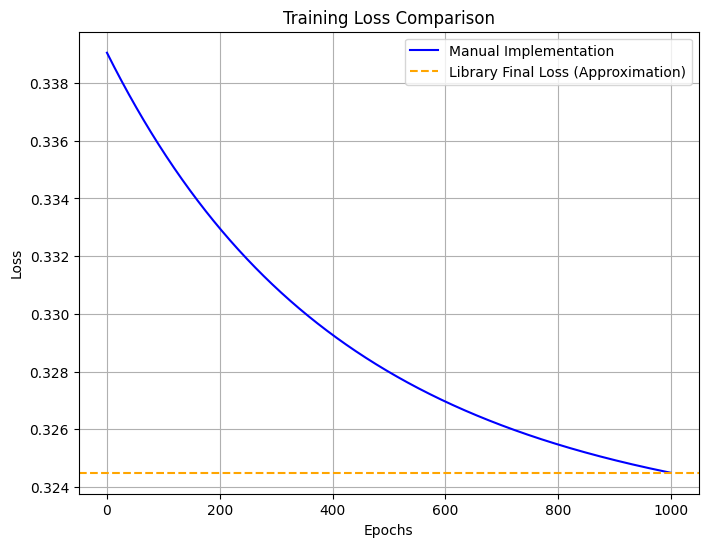

Library Implementation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7326
           1       0.99      0.22      0.36       851

    accuracy                           0.92      8177
   macro avg       0.96      0.61      0.66      8177
weighted avg       0.93      0.92      0.90      8177



In [ ]:

weights, bias, loss_history = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, epochs)
manual_predictions = predict(X_test.values, weights, bias)
manual_accuracy = np.mean(manual_predictions == y_test.values)
print(f"Accuracy of manual logistic regression: {manual_accuracy}")
library_model = LogisticRegression()
library_model.fit(X_train, y_train)

library_predictions = library_model.predict(X_test)
library_accuracy = accuracy_score(y_test, library_predictions)
print(f"Accuracy of scikit-learn logistic regression: {library_accuracy}")
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label='Manual Implementation', color='blue')
plt.axhline(y=loss_history[-1], color='orange', linestyle='--', label='Library Final Loss (Approximation)')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Library Implementation Report:")
print(classification_report(y_test, library_predictions))



### Task 4: Evaluate Model Performance

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
manual_precision = precision_score(y_test, manual_predictions)
manual_recall = recall_score(y_test, manual_predictions)
manual_f1 = f1_score(y_test, manual_predictions)
library_precision = precision_score(y_test, library_predictions)
library_recall = recall_score(y_test, library_predictions)
library_f1 = f1_score(y_test, library_predictions)

print("Manual Implementation Metrics:")
print(f"Accuracy: {manual_accuracy}")
print(f"Precision: {manual_precision}")
print(f"Recall: {manual_recall}")
print(f"F1-Score: {manual_f1}")
print("Library Implementation Metrics:")
print(f"Accuracy: {library_accuracy}")
print(f"Precision: {library_precision}")
print(f"Recall: {library_recall}")
print(f"F1-Score: {library_f1}")
print("Manual Model Classification Report:")
print(classification_report(y_test, manual_predictions))
print("Library Model Classification Report:")
print(classification_report(y_test, library_predictions))



Manual Implementation Metrics:
Accuracy: 0.8959276018099548
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Library Implementation Metrics:
Accuracy: 0.9190412131588602
Precision: 0.9947643979057592
Recall: 0.22326674500587543
F1-Score: 0.3646833013435701
Manual Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7326
           1       0.00      0.00      0.00       851

    accuracy                           0.90      8177
   macro avg       0.45      0.50      0.47      8177
weighted avg       0.80      0.90      0.85      8177

Library Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7326
           1       0.99      0.22      0.36       851

    accuracy                           0.92      8177
   macro avg       0.96      0.61      0.66      8177
weighted avg       0.93      0.92      0.90      8177



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

### Task 5: Visualize Model Results

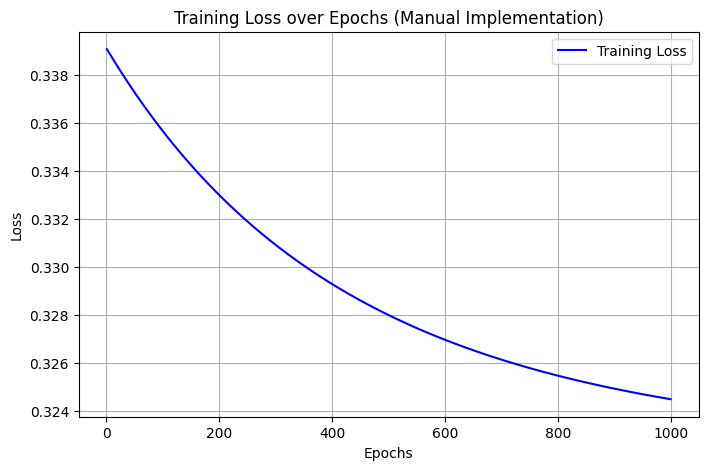

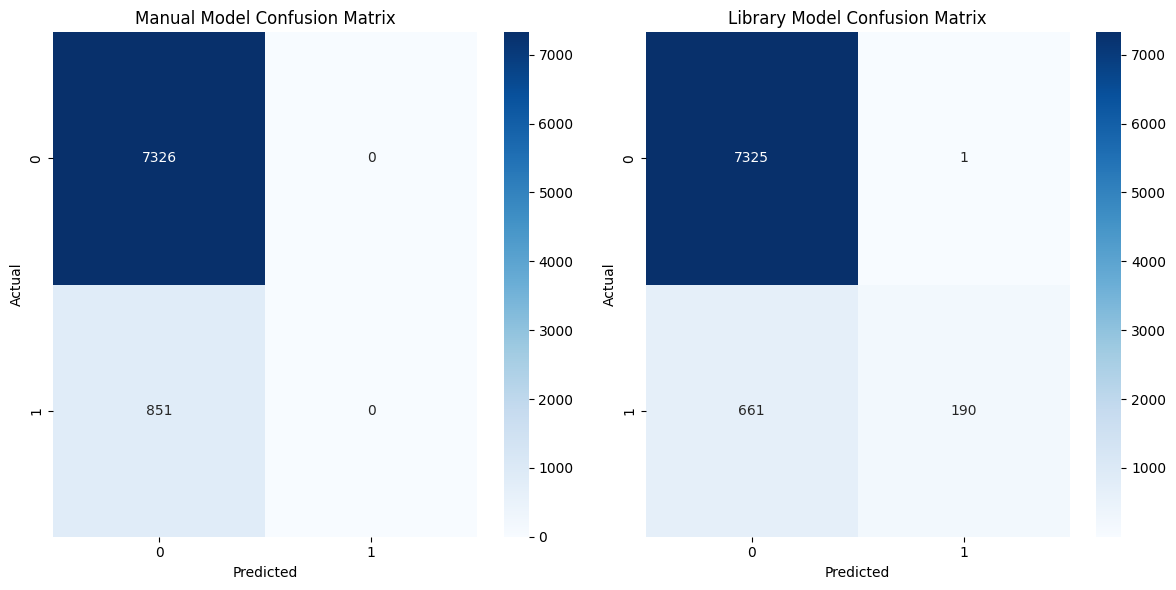

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label='Training Loss', color='blue')
plt.title('Training Loss over Epochs (Manual Implementation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

manual_conf_matrix = confusion_matrix(y_test, manual_predictions)
library_conf_matrix = confusion_matrix(y_test, library_predictions)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(manual_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Manual Model Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(library_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title("Library Model Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



## Part 2:  Neural Networks & Activation Functions

### Task 1:  Build a Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
def create_model(activation_function):
    model = Sequential([
        Dense(4, input_dim=X_train.shape[1], activation=activation_function),  
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

### Task 2:  Experiment with Activation Functions

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict = {}

for activation in activation_functions:
    print(f"\nآموزش مدل با تابع فعال‌سازی {activation}...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stopping], 
                        verbose=1)
    history_dict[activation] = history.history



آموزش مدل با تابع فعال‌سازی relu...
Epoch 1/50


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9130 - loss: 0.3031 - val_accuracy: 0.9407 - val_loss: 0.1725
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.9442 - loss: 0.1676 - val_accuracy: 0.9418 - val_loss: 0.1700
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9466 - loss: 0.1588 - val_accuracy: 0.9433 - val_loss: 0.1683
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9479 - loss: 0.1585 - val_accuracy: 0.9420 - val_loss: 0.1664
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9461 - loss: 0.1592 - val_accuracy: 0.9430 - val_loss: 0.1656
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9475 - loss: 0.1571 - val_accuracy: 0.9441 - val_loss: 0.1656
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9464 - loss: 0.1576 - val_accuracy: 0.9436 - val_loss: 0.1652
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9483 - loss: 0.1587 - val_accur

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0.3134 - val_accuracy: 0.9036 - val_loss: 0.2626
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9193 - loss: 0.2252 - val_accuracy: 0.9327 - val_loss: 0.1919
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9400 - loss: 0.1763 - val_accuracy: 0.9408 - val_loss: 0.1754
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1671 - val_accuracy: 0.9404 - val_loss: 0.1703
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9463 - loss: 0.1598 - val_accuracy: 0.9408 - val_loss: 0.1683
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9448 - loss: 0.1599 - val_accuracy: 0.9418 - val_loss: 0.1669
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9460 - loss: 0.1588 - val_accuracy: 0.9413 - val_loss: 0.1650
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9445 - loss: 0.1599 - val_ac

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9076 - loss: 0.2938 - val_accuracy: 0.9404 - val_loss: 0.1759
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1690 - val_accuracy: 0.9425 - val_loss: 0.1684
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9472 - loss: 0.1580 - val_accuracy: 0.9401 - val_loss: 0.1722
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9463 - loss: 0.1603 - val_accuracy: 0.9431 - val_loss: 0.1650
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9468 - loss: 0.1579 - val_accuracy: 0.9433 - val_loss: 0.1647
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9469 - loss: 0.1593 - val_accuracy: 0.9437 - val_loss: 0.1682
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9481 - loss: 0.1536 - val_accuracy: 0.9439 - val_loss: 0.1634
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9492 - loss: 0.1525 - val_accurac

### Task 3: Evaluate and Compare

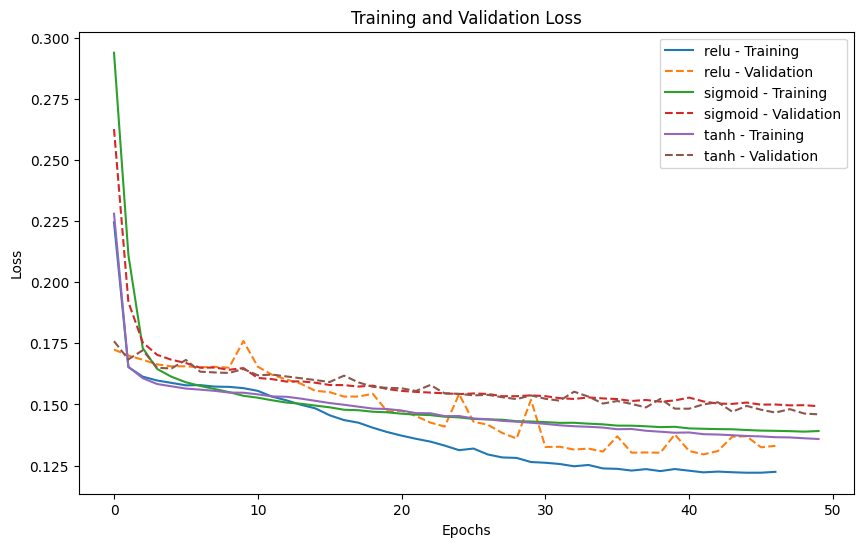

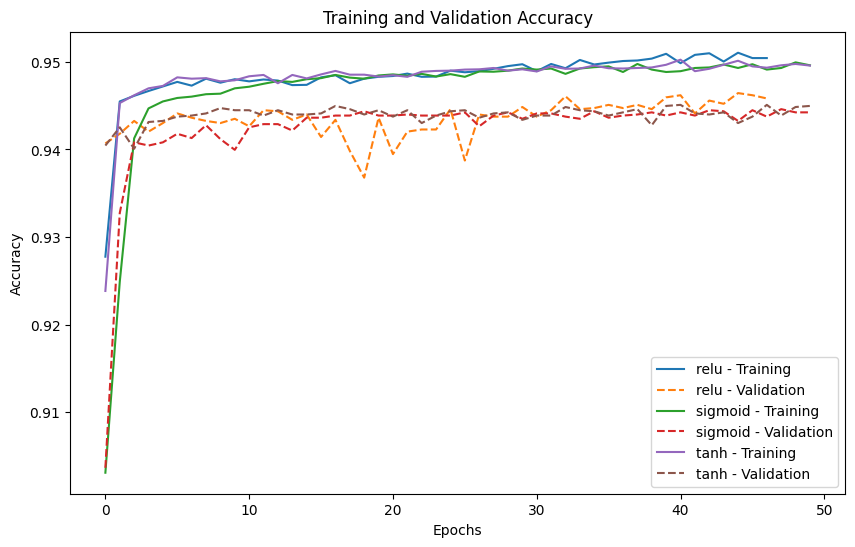

In [51]:
def plot_metrics(history_dict, metric, title):
    plt.figure(figsize=(10, 6))
    for activation, history in history_dict.items():
        plt.plot(history[metric], label=f'{activation} - Training')
        plt.plot(history[f'val_{metric}'], label=f'{activation} - Validation', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


plot_metrics(history_dict, 'loss', 'Training and Validation Loss')


plot_metrics(history_dict, 'accuracy', 'Training and Validation Accuracy')
